In [111]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [112]:
from simulation.tank import Simulator

In [113]:
simulator = Simulator()
report = simulator.simulate(horizon=50)

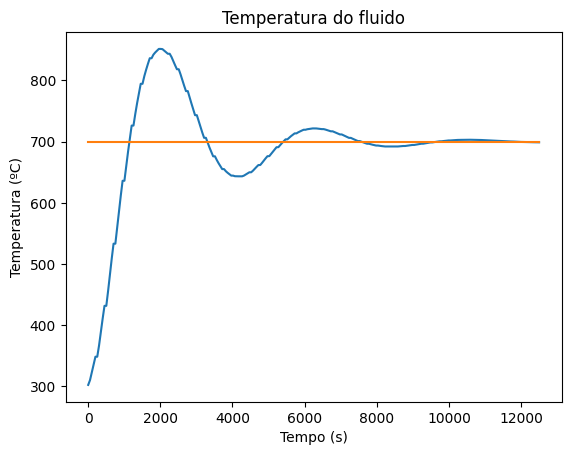

In [114]:
registers = report.fluid_temperature.shape[0]
t = np.linspace(0, registers*simulator.control_params.dt, num=registers)
plt.plot(t, report.fluid_temperature)
plt.plot(t, np.ones(len(t)) * simulator.control_params.SP)

plt.title("Temperatura do fluido")
plt.ylabel("Temperatura (ºC)")
plt.xlabel("Tempo (s)");

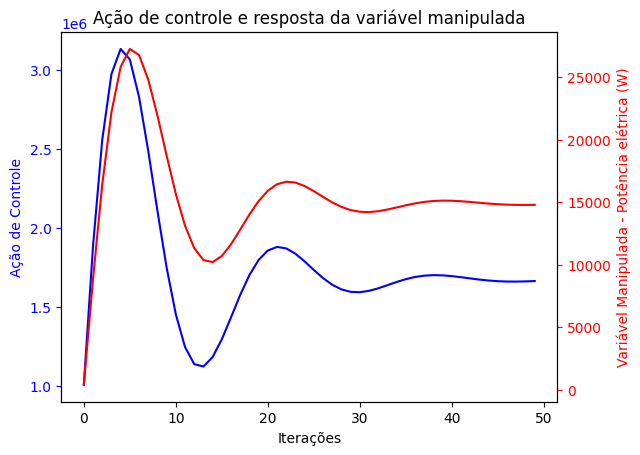

In [115]:
action = report.control_action
resistencia = [v for i, v in enumerate(report.resistence_temperature) if i%5==0]
x = [i for i in range(len(action))]

# Criar a figura e os eixos
fig, ax1 = plt.subplots()

# Plotar a linha usando o eixo y1
ax1.plot(x, action, 'b-')
ax1.set_xlabel('Iterações')
ax1.set_ylabel('Ação de Controle', color='b')
ax1.tick_params('y', colors='b')

# Criar um segundo eixo y
ax2 = ax1.twinx()

# Plotar a linha usando o eixo y2
ax2.plot(x, resistencia, 'r-')
ax2.tick_params('y', colors='r')
ax2.set_ylabel('Variável Manipulada - Potência elétrica (W)', color='r')
# ax2
plt.title("Ação de controle e resposta da variável manipulada")
plt.show()

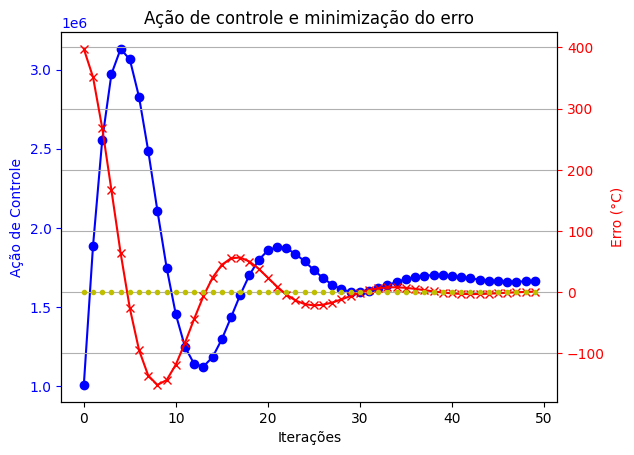

In [116]:
action = report.control_action
erro = report.errors
x = [i for i in range(len(action))]

# Criar a figura e os eixos
fig, ax1 = plt.subplots()

# Plotar a linha usando o eixo y1
ax1.plot(x, action, 'b-', marker='o')
ax1.set_xlabel('Iterações')
ax1.set_ylabel('Ação de Controle', color='b')
ax1.tick_params('y', colors='b')

# Criar um segundo eixo y
ax2 = ax1.twinx()

# Plotar a linha usando o eixo y2
ax2.plot(x, erro, 'r-', marker='x')
plt.grid(axis='both')
ax2.plot(x, np.zeros(len(x)), 'y.')
ax2.tick_params('y', colors='r')
ax2.set_ylabel('Erro (°C)', color='r')
# ax2

plt.title("Ação de controle e minimização do erro")
plt.show()